In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("C:/Users/admin/Downloads/Telegram Desktop/StudentsPerformance.csv")
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [3]:
#Eliminating columns that are of no use
df=df.iloc[:,5:]
df

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


In [4]:
#Checking for null value
df.isnull().sum()

math score       0
reading score    0
writing score    0
dtype: int64

In [5]:
#Checking if all the elements have numeric data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
math score       1000 non-null int64
reading score    1000 non-null int64
writing score    1000 non-null int64
dtypes: int64(3)
memory usage: 23.6 KB


In [6]:
#K MEANS
from sklearn.cluster import KMeans
s=[]
Rng=range(1,10)
for k in Rng:
    km=KMeans(n_clusters=k)
    km.fit(df)
    s.append(km.inertia_)
s

[673318.602,
 281951.8965908354,
 177450.25542956137,
 136364.68288301653,
 111307.99410631621,
 97494.74710877752,
 85709.45733203906,
 76817.95497764907,
 68328.05523694705]

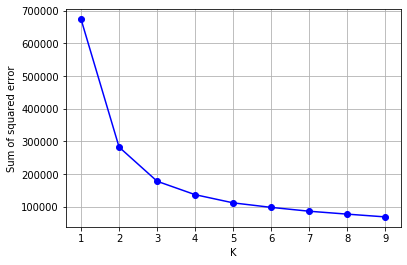

In [8]:
#Applying elbow method to find the value of k
plt.plot(Rng,s,'bo',linestyle='solid')
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.grid()
plt.show()

In [9]:
#Using value of k=3 (found out from elbow method)
km=KMeans(n_clusters=3)
km.fit(df)
x=km.labels_
x

array([1, 2, 2, 0, 2, 2, 2, 0, 1, 0, 0, 0, 1, 1, 0, 1, 2, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 2, 0, 2, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 2, 0, 1, 0, 2, 2, 0, 2, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 2, 1, 1, 0, 0, 0, 1, 0, 2, 2, 1,
       1, 2, 1, 0, 1, 0, 2, 2, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 1, 1, 1,
       2, 0, 0, 0, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 0, 2, 0,
       2, 2, 2, 0, 0, 1, 1, 1, 1, 1, 0, 0, 2, 0, 2, 1, 1, 2, 1, 1, 1, 0,
       1, 2, 1, 1, 2, 1, 2, 2, 0, 0, 2, 2, 0, 1, 2, 1, 1, 2, 2, 1, 0, 2,
       0, 1, 1, 2, 1, 1, 0, 1, 0, 1, 1, 1, 0, 2, 1, 2, 1, 1, 2, 0, 1, 0,
       0, 2, 2, 1, 1, 1, 0, 1, 1, 2, 2, 1, 2, 0, 0, 0, 2, 2, 2, 0, 1, 0,
       1, 2, 1, 2, 1, 0, 1, 0, 1, 2, 1, 0, 2, 2, 2, 2, 1, 1, 0, 2, 1, 2,
       0, 0, 1, 2, 2, 1, 1, 1, 0, 2, 1, 2, 0, 1, 1, 2, 1, 2, 1, 2, 0, 2,
       1, 0, 1, 1, 2, 1, 1, 0, 0, 1, 2, 2, 2, 1, 2, 1, 0, 0, 2, 1, 0, 2,
       2, 2, 2, 2, 1, 2, 1, 1, 2, 1, 0, 1, 0, 2, 2,

Text(0.5, 1.0, 'Math score vs writing score')

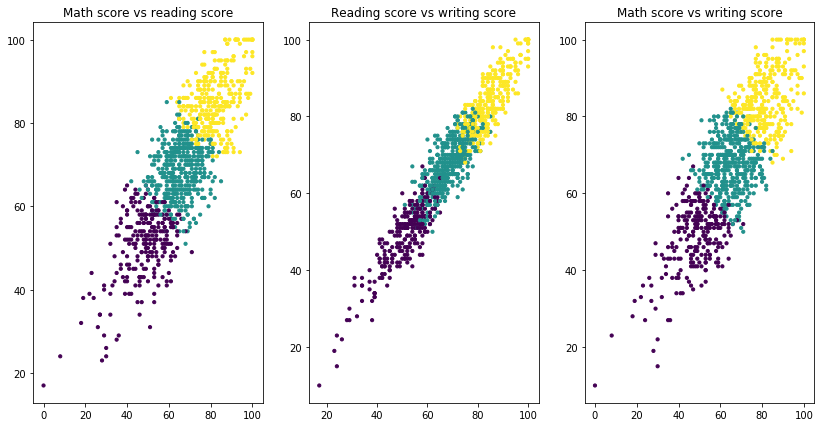

In [20]:
#Scatter plots showing clusters formed using KMeans method for different different subject combinations

plt.figure(figsize=(14,7))
plt.subplot(1,3,1)
plt.scatter(df["math score"],df["reading score"],c=x,s=10)
plt.title("Math score vs reading score")
plt.subplot(1,3,2)
plt.scatter(df["reading score"],df["writing score"],c=x,s=10)
plt.title("Reading score vs writing score")
plt.subplot(1,3,3)
plt.scatter(df["math score"],df["writing score"],c=x,s=10)
plt.title("Math score vs writing score")

In [21]:
X=df.values
X

array([[72, 72, 74],
       [69, 90, 88],
       [90, 95, 93],
       ...,
       [59, 71, 65],
       [68, 78, 77],
       [77, 86, 86]], dtype=int64)

In [22]:
#HIERARCHICAL
import scipy.cluster.hierarchy as sch

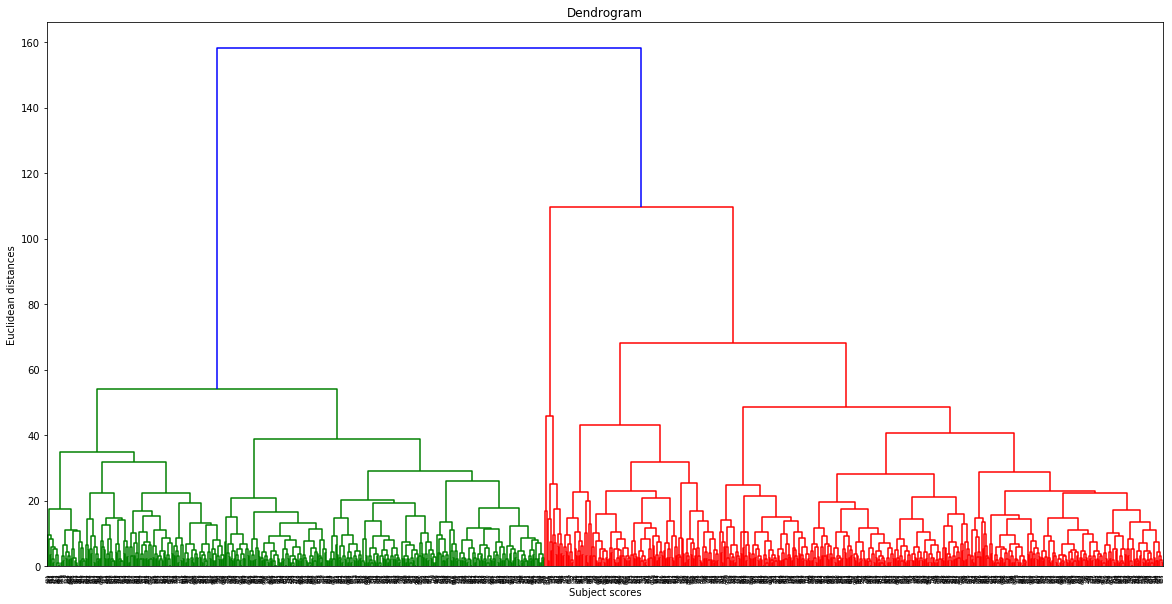

In [23]:
plt.figure(figsize=(20,10))
dendrogram=sch.dendrogram(sch.linkage(X,method="complete"))
plt.title("Dendrogram")
plt.xlabel("Subject scores")
plt.ylabel("Euclidean distances")
plt.show()

In [24]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=3, affinity='euclidean',linkage='complete')

In [25]:
y_hc=hc.fit_predict(X)
y_hc

array([1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 2, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 2, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 2, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 2, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 2, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,

Text(0.5, 1.0, 'Math score vs Writing score')

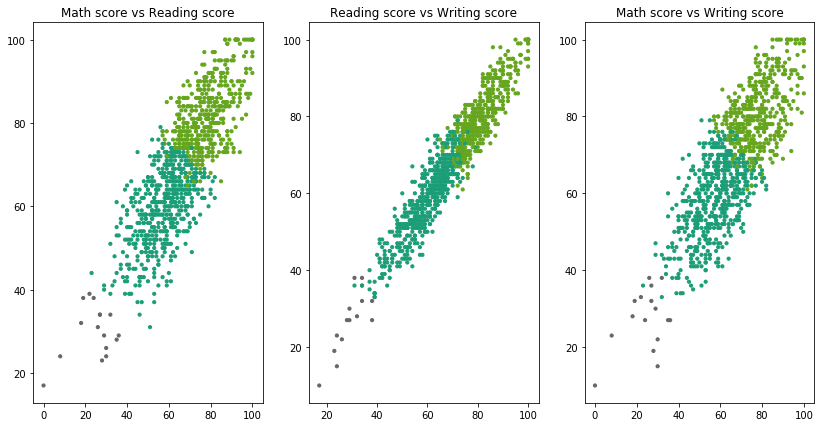

In [26]:
#Scatter plots showing clusters formed using Hierarchical method for different different subject combinations
plt.figure(figsize=(14,7))
plt.subplot(1,3,1)
plt.scatter(X[:,0],X[:,1],c=y_hc,cmap='Dark2',s=10)
plt.title("Math score vs Reading score")
plt.subplot(1,3,2)
plt.scatter(X[:,1],X[:,2],c=y_hc,cmap='Dark2',s=10)
plt.title("Reading score vs Writing score")
plt.subplot(1,3,3)
plt.scatter(X[:,0],X[:,2],c=y_hc,cmap='Dark2',s=10)
plt.title("Math score vs Writing score")

In [27]:
#DBSCAN
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=10, min_samples=20)

In [28]:
y_dbscan=dbscan.fit_predict(X)
y_dbscan

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

Text(0.5, 1.0, 'Math score vs Writing score')

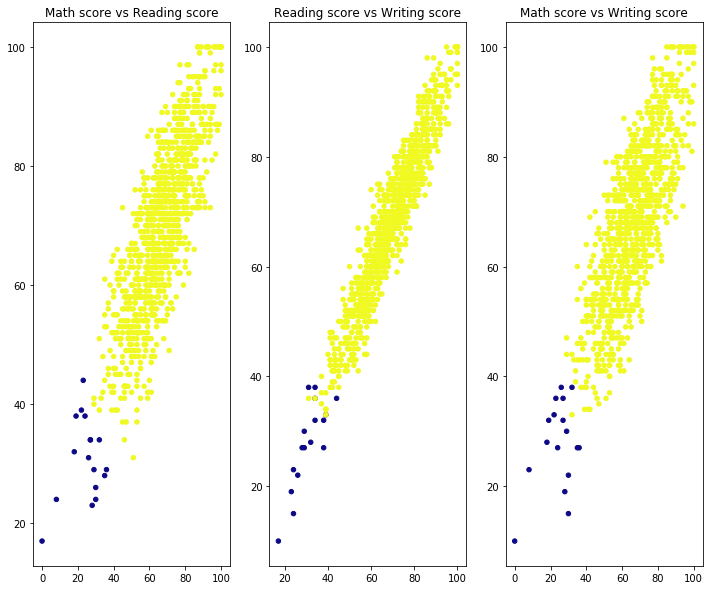

In [29]:
#Scatter plots showing clusters formed using DBSCAN method for different different subject combinations
plt.figure(figsize=(12,10))
plt.subplot(1,3,1)
plt.scatter(X[:,0],X[:,1],c=y_dbscan,cmap='plasma',s=20)
plt.title("Math score vs Reading score")
plt.subplot(1,3,2)
plt.scatter(X[:,1],X[:,2],c=y_dbscan,cmap='plasma',s=20)
plt.title("Reading score vs Writing score")
plt.subplot(1,3,3)
plt.scatter(X[:,0],X[:,2],c=y_dbscan,cmap='plasma',s=20)
plt.title("Math score vs Writing score")